# voice_clustering
This notebook attempts to use the `pyAudioAnalysis` library for voice clustering/speaker diarisation. This can be used to help the overall goal of dialogue attribution. With two-character dialogue scenes identified, we need to be able to see which lines of dialogue were spoken by which character.

In [1]:
import pyAudioAnalysis.audioSegmentation

`pyAudioAnalysis` has a function to automatically identify changes in speakers. We specify that there are two characters speaking. When a character starts speaking, they are listed as the speaker until the other character speaks, or until the end of the scene. (Periods of silence will be attributed to the last character who spoke.) 

Here's an example of a .wav file manually extracted from a two-character scene in *Hobbs and Shaw*, and converted into stereo format (from 5.1 surround sound) for use in `speaker_diarization()`.

In [2]:
file = ('extracted_audio/diner_stereo.wav')

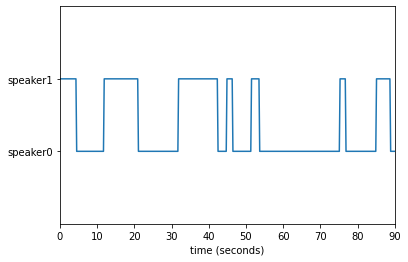

In [3]:
clusters = pyAudioAnalysis.audioSegmentation.speaker_diarization(file, n_speakers=2, mid_window=1, lda_dim=0, plot_res=True)

This is also available in a NumPy array. Every .2 seconds (or 5 times a second), the current (or last) speaker is noted.

In [4]:
clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1.

Here's another example from *Hobbs and Shaw*, with a scene with more back-and-forth and less monologue compared to the previous example. The following are three attempts at diarising the scene: the mid- and short-term windows were successively shortened, to allow for more sampling, which generated better results. 

In [5]:
file = ('extracted_audio/prison_stereo.wav')

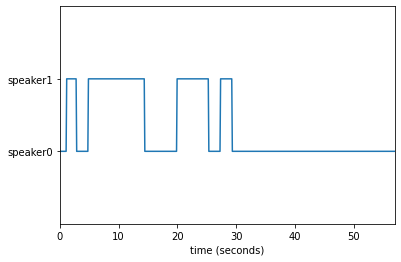

CPU times: user 12.8 s, sys: 638 ms, total: 13.4 s
Wall time: 4.65 s


In [6]:
%%time
clusters = pyAudioAnalysis.audioSegmentation.speaker_diarization(file, n_speakers=2, mid_window=1, mid_step=0.1, lda_dim=0, plot_res=True)

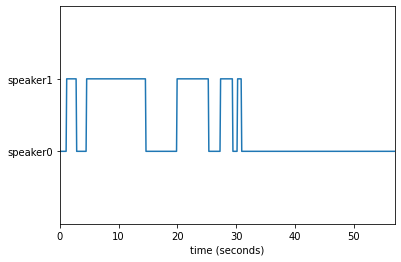

CPU times: user 22 s, sys: 1e+03 ms, total: 23 s
Wall time: 7.32 s


In [7]:
%%time
clusters = pyAudioAnalysis.audioSegmentation.speaker_diarization(file, n_speakers=2, mid_window=1, mid_step=0.1, short_window=0.02, lda_dim=0, plot_res=True)

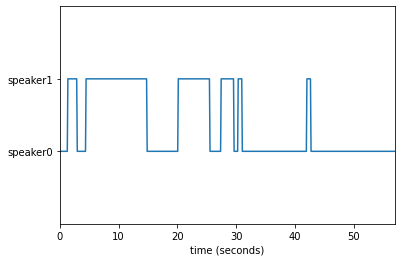

CPU times: user 24 s, sys: 1.34 s, total: 25.3 s
Wall time: 8.38 s


In [8]:
%%time
clusters = pyAudioAnalysis.audioSegmentation.speaker_diarization(file, 2, mid_window=.8, mid_step=0.1, short_window=0.02, lda_dim=0, plot_res=True)

While I manually specified that there were two characters to diarise, this prison scene actually has a third scene, a prison guard with a single two-word line "time's up". `speaker_diarization()` allows the user to specify 0 to indicate an unknown number of speakers, but it was unable to identify this third speaker, possibly because the line was so short.

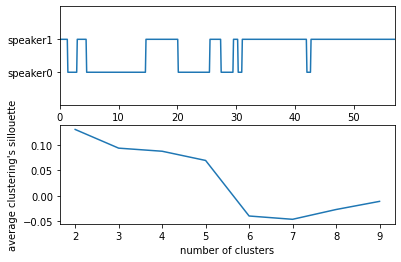

CPU times: user 27.2 s, sys: 1.43 s, total: 28.6 s
Wall time: 9.62 s


In [9]:
%%time
clusters = pyAudioAnalysis.audioSegmentation.speaker_diarization(file, 0, mid_window=.8, mid_step=0.1, short_window=0.02, lda_dim=0, plot_res=True)

Though we were unable to detect a third speaker, we may choose to not pre-specify two speakers. Though we're primarily working with two-character scenes, some of these scenes may have additional characters appear to deliver lines.